### import library

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from matplotlib import cm as cm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

### load data

In [2]:
def loadData(file):
    data = pd.read_csv('data/'+file, sep="\t", header=None)
    return data

In [53]:
#load data
xtrain = loadData('xtrain.txt').T
xtest = loadData('xtest.txt').T
ytrain = loadData('ytrain.txt')

# #take first row as columns names
header1 = xtrain.iloc[0]
xtrain = xtrain[1:]
xtrain = xtrain.rename(columns = header1)

header2 = xtest.iloc[0]
xtest = xtest[1:]
xtest = xtest.rename(columns = header2)


In [4]:
xtrain.shape, ytrain.shape

((184, 4654), (184, 1))

In [5]:
negatif = 0
positif = 0
for i in range(len(ytrain)):
    if ytrain[0][i] == -1:
        negatif += 1
    else:
        positif += 1
print(negatif, positif)

118 66


In [6]:
xtrain.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.44,7.84,9.23,2.2,4.93,10.31,7.85,9.91,11.37,3.48,...,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.7,7.23,8.28
2,7.93,8.47,7.77,2.48,6.7,11.03,3.33,9.53,10.91,4.28,...,9.98,10.4,5.96,7.61,9.51,8.2,9.27,4.7,6.7,12.78
3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,8.34,10.57,6.92,8.2,8.71,8.56,8.9,4.7,7.7,12.22
4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.9,7.4,...,9.05,10.92,5.73,8.44,9.18,7.86,9.3,5.58,7.95,12.18
5,7.89,7.75,6.99,2.2,7.06,11.38,3.65,9.22,10.37,3.89,...,9.16,10.73,7.45,7.79,9.15,7.97,8.5,4.7,6.63,12.12


In [7]:
xtest.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.54,7.76,8.08,2.2,7.23,10.07,4.16,9.77,10.7,5.35,...,9.44,11.18,6.65,7.92,9.32,8.48,8.51,4.01,7.91,9.46
2,8.13,8.18,7.68,2.2,7.11,8.91,5.05,8.8,10.64,4.86,...,8.51,11.31,5.76,7.43,10.39,8.23,9.49,4.7,7.14,7.02
3,7.94,8.26,7.37,2.2,6.98,11.81,4.16,10.07,10.64,4.3,...,8.4,10.2,5.35,8.42,9.44,7.87,8.64,4.78,6.13,10.57
4,8.7,8.08,8.27,2.2,7.45,7.9,5,8.66,10.41,5.07,...,8.9,10.77,6.6,7.8,9.39,8.74,9.61,5.13,6.73,5.31
5,8.97,8.2,8.87,2.2,6.98,11.49,3.47,9.97,11.63,4.65,...,9.15,11.9,7.34,8.26,8.81,8.12,9.93,7.07,6.84,3


In [ ]:
np.all(xtrain.columns == xtest.columns)

In [ ]:
xtrain.describe()

### Features Selection

In [ ]:
np.random.seed(41)
names = xtrain.columns.values
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
importances = []
nameslist = []
for name, importance in zip(names, rf.feature_importances_):
    if importance != 0.0:
        #print(name, "=", importance) 
        importances.append(importance)
        nameslist.append(name)
#features = iris['feature_names']
# importances = rf.feature_importances_
# indices = np.argsort(importances)


In [ ]:
x_train = xtrain[nameslist]

In [ ]:
featuresImportances = pd.DataFrame(importances, index=nameslist, 
                              columns=["Importance"])
featuresImportances = featuresImportances.sort_values(by=['Importance'], ascending=False)
featuresImportances

In [ ]:
nameslist = np.array(nameslist)
importances.sort()
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances, align='center')
#plt.yticks(range(len(nameslist)), [nameslist[i] for i in range(len(nameslist))])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

### Lasso features selection

/usr/lib/python3/dist-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Features reduced from       4654 to        242


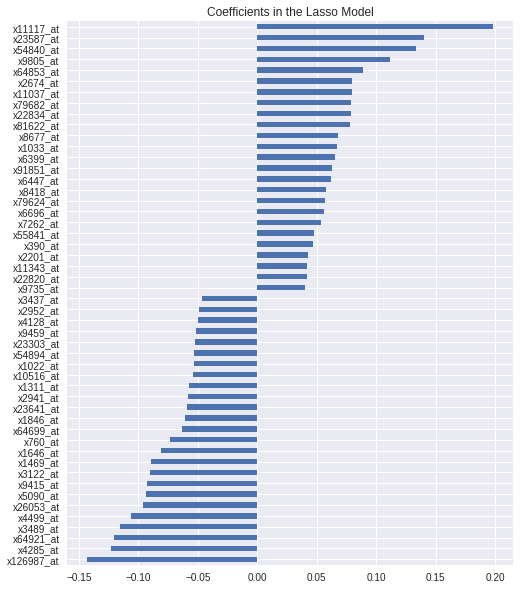

In [203]:
from sklearn.linear_model import Lasso
x_train = np.array(xtrain)
lass = Lasso(
        max_iter=3000,
        alpha= 0.000281,
        random_state= 5 
        )
lass.fit(xtrain,ytrain)
lass.coef_.min(), lass.coef_.max()
#Checking Features Importances
import matplotlib
coef = pd.Series(lass.coef_, index = xtrain.columns)
#print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


imp_coef = pd.concat([coef.sort_values().head(25),
                     coef.sort_values().tail(25)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Selection of features
good_features = np.abs(np.array(lass.coef_)) > 0

print("Features reduced from %10d to %10d" % (x_train.shape[1], int(good_features.sum())))
#saving data
train_lasso_select = xtrain.iloc[:, good_features]
test_lasso_select= xtest.iloc[:, good_features]
train_lasso_select.to_csv('train_lasso_select.csv',index=False)
test_lasso_select.to_csv('test_lasso_select.csv',index=False)

In [9]:
xtrain_lasso = xtrain.T[good_features].T

In [10]:
xtest_lasso = xtest.T[good_features].T

### split data

In [11]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(xtrain_lasso, ytrain,test_size=0.34 )
Xtrain,Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain,test_size=0.17 )

In [12]:
Xtrain.shape, Xval.shape, Xtest.shape, xtest.shape

((100, 242), (21, 242), (63, 242), (92, 4654))

### Plot Area Under Curve

In [13]:
from sklearn import metrics 
def plot_roc(model, parameters, y_true):
    """
    Arguments:
    model - trained model .
    parameters - array-like or sparse matrix of shape  [n_samples, n_features]. The input samples. 
    y_true - True binary labels in range {0, 1} or {-1, 1}. If labels are not binary, pos_label should be explicitly given.
    """
    if model is None:
        return 0., 0., np.array([])
    
    predicted = model.predict_proba(parameters)[:,1]
    threshold = 0.5
    predicted_binary = (predicted > threshold).astype(int)
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, predicted, pos_label=1)

    roc_auc = metrics.auc(fpr, tpr) 
    ks = np.max(tpr - fpr) # Kolmogorov-Smirnov test

#     print('ROC_auc = ', roc_auc)
#     print('KS_test = ', ks)
    print('AUC score: %f ' % metrics.roc_auc_score(y_true, predicted)) 

    try:
        plt.title('%s ROC curve ' % model.__class__.__name__)
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1], [0,1], 'r--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')

        # plt.savefig('ROC_curve.png')
        plt.show()
    except: pass
    return threshold

### Logistic Regression

In [14]:
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)[:,0]

In [212]:
x_train_all, y_train_all = np.array(xtrain_lasso), np.array(ytrain)[:,0]

In [19]:
# Grid search cross validation
np.random.seed(41)
grid={"C":np.linspace(10e-3,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrain,Ytrain)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5.5600000000000005, 'penalty': 'l2'}
accuracy : 0.87


In [20]:
logreg2=LogisticRegression(C= 5.56,penalty="l2")
logreg2.fit(Xtrain,Ytrain)
print("score",logreg2.score(Xval,Yval))

score 0.6666666666666666


In [21]:
print("score",logreg2.score(Xtest,Ytest))

score 0.8095238095238095


AUC score: 0.905585 


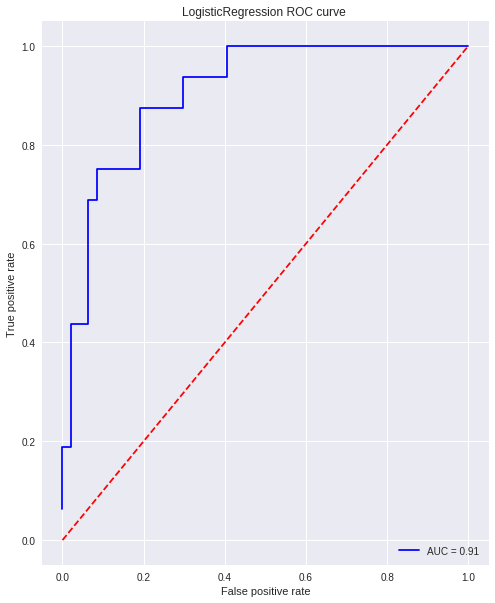

In [22]:
threshold = plot_roc(logreg2, Xtest, Ytest)

### training on all Dataset

In [214]:
# Grid search cross validation
np.random.seed(41)
grid={"C":np.linspace(10e-3,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_all=LogisticRegression()
logreg_cv_all=GridSearchCV(logreg,grid,cv=10)
logreg_cv_all.fit(x_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",logreg_cv_all.best_params_)
print("accuracy :",logreg_cv_all.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 2.23, 'penalty': 'l2'}
accuracy : 0.9293478260869565


In [216]:
logreg2_all=LogisticRegression(C= 2.23,penalty="l2")
logreg2_all.fit(x_train_all,y_train_all)
print("score",logreg2_all.score(x_train_all, y_train_all))

score 1.0


### Logistic regression CV

In [23]:
logregcv = LogisticRegressionCV(Cs=10)
logregcv.fit(Xtrain, Ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [24]:
print("score",logreg2.score(Xtest,Ytest))

score 0.8095238095238095


AUC score: 0.905585 


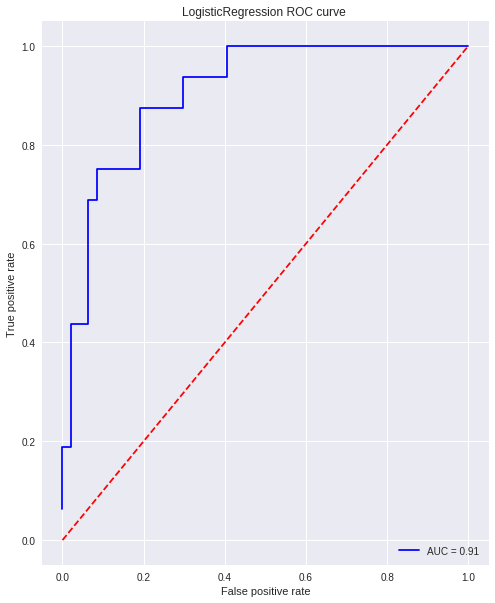

In [25]:
threshold = plot_roc(logreg2, Xtest, Ytest)

### training on all Dataset

In [217]:
logregcv_all = LogisticRegressionCV(Cs=10)
logregcv_all.fit(x_train_all, y_train_all)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### SVM

In [221]:
def svc_param_selection(X, y, nfolds):
    np.random.seed(41)
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [222]:
svc_param_selection(Xtrain, Ytrain, 10)

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [223]:
svcmodel = SVC(C = 0.01, gamma=0.001, kernel='linear', probability=True)
svcmodel.fit(Xtrain, Ytrain)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Validation score 0.7142857142857143
--------------------------------------------
test score 0.8412698412698413
--------------------------------------------
AUC score: 0.922872 


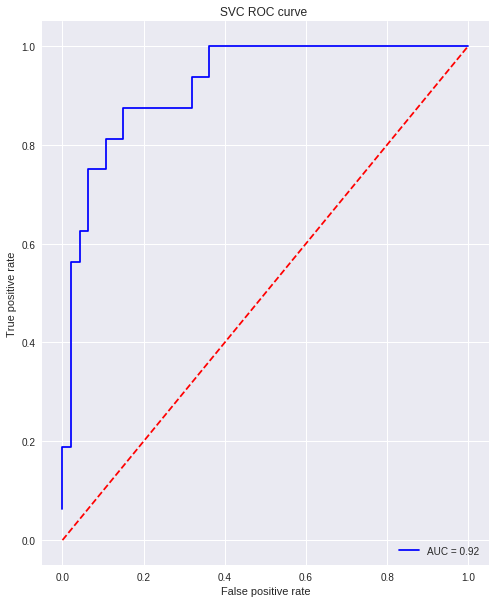

In [224]:
print("Validation score",svcmodel.score(Xval,Yval))
print("--------------------------------------------")
print("test score",svcmodel.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(svcmodel, Xtest, Ytest)

In [225]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = svcmodel.predict(Xtest)
cm = metrics.confusion_matrix(Ytest, y_pred)
#print(cm)

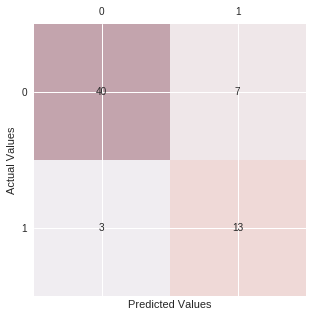

             precision    recall  f1-score   support

         -1       0.93      0.85      0.89        47
          1       0.65      0.81      0.72        16

avg / total       0.86      0.84      0.85        63



In [226]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(Ytest, y_pred ))

# training on all Dataset

In [218]:
svc_param_selection(x_train_all, y_train_all, 10)

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [227]:
svcmodel_all = SVC(C = 0.01, gamma=0.001, kernel='linear', probability=True)
svcmodel_all.fit(x_train_all, y_train_all)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### KNN

In [32]:
def KNN_param_selection(X, y):
    np.random.seed(41)
    k_range = list(range(1, 20))
    
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    knn = KNeighborsClassifier()
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10)
    # fit the grid with data
    grid.fit(X, y)
    return grid.best_params_

In [33]:
KNN_param_selection(Xtrain, Ytrain)

{'n_neighbors': 10, 'weights': 'distance'}

In [34]:
knnmodel = KNeighborsClassifier(n_neighbors=10, weights='distance')
knnmodel.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

Validation score 0.5714285714285714
--------------------------------------------
test score 0.6349206349206349
--------------------------------------------
AUC score: 0.617021 


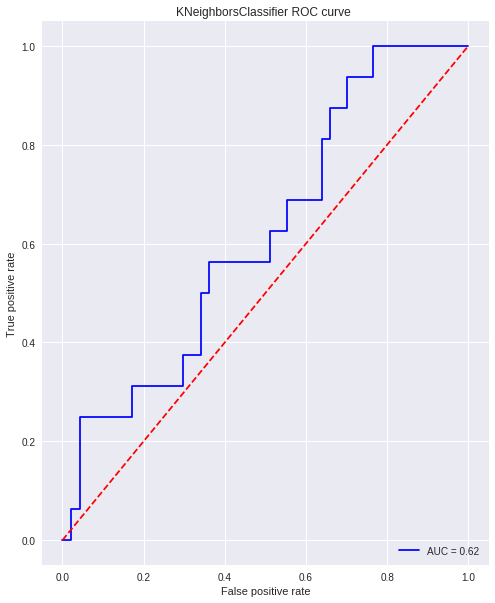

In [35]:
print("Validation score",knnmodel.score(Xval,Yval))
print("--------------------------------------------")
print("test score",knnmodel.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(knnmodel, Xtest, Ytest)

### KNN on all Dataset

In [220]:
KNN_param_selection(x_train_all, y_train_all)

{'n_neighbors': 7, 'weights': 'uniform'}

In [228]:
knnmodel_all = KNeighborsClassifier(n_neighbors=10, weights='distance')
knnmodel_all.fit(x_train_all, y_train_all)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

### Gradient Boosting Classifier

In [36]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.7301587301587301

AUC score: 0.767287 


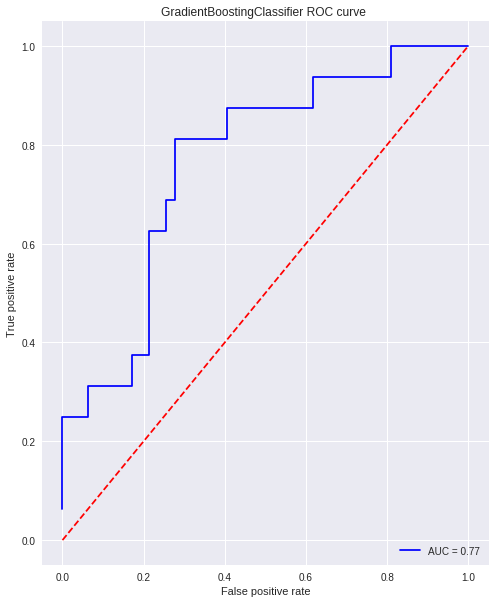

In [37]:
threshold = plot_roc(clf, Xtest, Ytest)

### Gradient Boosting Classifier on all Dataset

In [229]:
clf_all = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(x_train_all, y_train_all)

### NuSVM

In [101]:
nusvc = NuSVC(nu=0.2, kernel='linear', probability=True)

In [102]:
nusvc.fit(Xtrain, Ytrain)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, nu=0.2, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

Validation score 0.7142857142857143
--------------------------------------------
test score 0.8412698412698413
--------------------------------------------
AUC score: 0.922872 


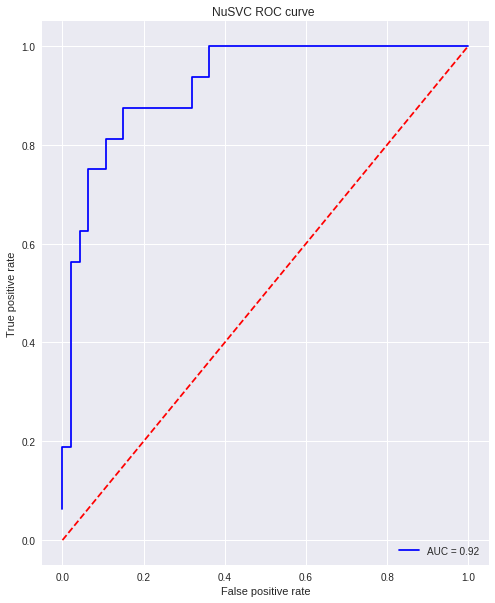

In [103]:
print("Validation score",nusvc.score(Xval,Yval))
print("--------------------------------------------")
print("test score",nusvc.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(nusvc, Xtest, Ytest)

### NuSVC on all Dataset

In [230]:
nusvc_all = NuSVC(nu=0.2, kernel='linear', probability=True)

In [231]:
nusvc_all.fit(x_train_all, y_train_all)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, nu=0.2, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

### DecisionTreeClassifier

In [107]:
param_grid = {
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': [81, 91, 101, 107],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 3],
}
# Create a based model
dtc = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#Ytrain = ytrain.reshape(len(Ytrain),)
grid_search.fit(Xtrain,Ytrain)
grid_search.best_params_

Fitting 10 folds for each of 396 candidates, totalling 3960 fits
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, 

[CV]  max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=2 
[CV] max_features=81, 

[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samp

[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=91,

[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[C

[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV] max_f

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.6s


[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV]  max_

[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[

[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=81

[CV] max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV]  max_features=81, min_samp

[CV]  max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_feat

[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=91, min_sampl

[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=1 -

[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV] max_f

[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_fe

[CV] max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s

[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=81, min_sampl

[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV] max_feat

[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=

[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_sp

[CV] max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV]  max_

[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_

[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_

[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV]

[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=91, 

[CV]  max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_s

[CV] max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_fe

[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=1

[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_f

[CV]  max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV] 

[CV]  max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=107

[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV] max_features=81, min_sampl

[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_feat

[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=1 
[CV]  max_featur

[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=3 


[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:    4.5s


[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[

[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[

[CV]  max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV]  max_f

[CV]  max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV]  max_features=8

[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_fea

[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samp

[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[C

[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[

[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_

[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_s

[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV] max_fea

[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=81,

[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=101

[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=

[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV] max_features=1

[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV] max_f

[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=107

[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[C

[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=81,

[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=91, min_samp

[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV] max_features=101, min

[CV]  max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV]  max_features=101, min_

[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV]  max_features=

[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[C

[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV]  max_features

[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=

[CV] max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV]  max_features=91, min_samp

[CV]  max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV]  max_features=91, min_

[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV] max_fea

[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV]  max_features=101, min_

[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV]  max_features=

[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=1 
[CV] max_f

[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_f

[CV] max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=9

[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_f

[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=

[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=

[CV]  max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2

[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=1 -   0.0s
[C

[CV]  max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[

[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_

[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  ma

[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[C

[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2

[CV] max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=110, min_sample

[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_sample

[Parallel(n_jobs=-1)]: Done 3960 out of 3960 | elapsed:   11.1s finished


{'max_depth': 50,
 'max_features': 91,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [109]:
treeclassifier = DecisionTreeClassifier(max_depth=50, max_features=91, min_samples_leaf=5, min_samples_split=3)
treeclassifier.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=91, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Validation score 0.38095238095238093
--------------------------------------------
test score 0.6349206349206349
--------------------------------------------
AUC score: 0.638298 


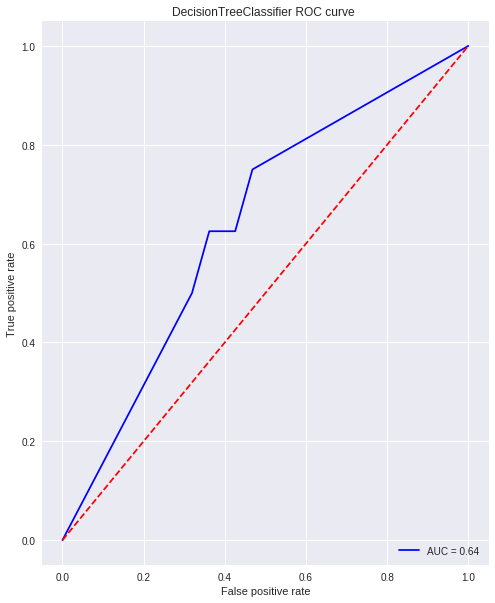

In [110]:
print("Validation score",treeclassifier.score(Xval,Yval))
print("--------------------------------------------")
print("test score",treeclassifier.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(treeclassifier, Xtest, Ytest)

### DecisionTreeClassifier on all Dataset

In [234]:
param_grid = {
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': [81, 91, 101, 107],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 3],
}
# Create a based model
dtc_all = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_all = GridSearchCV(estimator = dtc_all, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#Ytrain = ytrain.reshape(len(Ytrain),)
grid_search_all.fit(x_train_all, y_train_all)
grid_search_all.best_params_

Fitting 10 folds for each of 396 candidates, totalling 3960 fits
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth

[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV]

[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV]

[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.5s


[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=91, 

[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV]  

[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV]  max_

[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=10, min_samples_split=2 -   0.0s
[

[CV] max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=10, min_samples_split=2 -   0.0s
[CV] max_f

[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4

[CV] max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV] max_features=81, min_sampl

[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=20, min_samples_split=2 
[CV]  max_features=91, min_samp

[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV]  ma

[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=

[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[

[CV] max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_

[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=20, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV

[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV]  max_fea

[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=91, 

[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    3.7s


[CV] max_features=91, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_features=91, min_samp

[CV] max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=30, min_samples_split=3 -  

[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=1

[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=30, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=1 -   0.0s
[

[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=30, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=30, min_samples_split=3 
[CV]  max_fe

[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=

[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV] max_feat

[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=40, min_samples_split=2 
[CV] max_features=91, 

[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV] max_features=1

[CV]  max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV]  max_features=

[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=40, min_samples_split=2 
[CV]  max_features=

[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=40, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=40, min_samples_split=3 -   0.0s
[CV]  max_

[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=81, 

[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=81, 

[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV]  max_features=91,

[CV] max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.

[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV] max_features=1

[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_f

[CV] max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=50, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=50, min_samples_split=3 -   0.0s
[CV] max_f

[CV] max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=81, 

[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=81, min_samp

[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=91,

[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_fe

[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=60, min_samples_split=1 -

[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_f

[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:    8.9s


[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=60, min_samples_split=1 
[CV] max_f

[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=60, min_samples_split=1 -   0.0s
[CV]  max_

[CV] max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=60, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=81

[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=81,

[CV] max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=91, min_sampl

[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV]  max_features=91, min_samp

[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=

[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=70, min_samples_s

[CV]  max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=70, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=70, min_samples_split=3 
[CV] max_f

[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=70, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_

[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=81, min_sampl

[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=91,

[CV]  max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV] max_features=91, 

[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=

[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=80, min_samples_split=3 
[

[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=80, min_samples_split=3 
[CV]  max_features=

[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=80, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV] max

[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=81, min_sampl

[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV]  max_features=91,

[CV]  max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV] max_features=91,

[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[

[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=90, min_samples_split=3 -   0.0s
[

[CV]  max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=90, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=

[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=4, max_depth=90, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=90, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_f

[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_f

[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV]  max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[

[CV]  max_features=91, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV]  max_features=

[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=91, min_samples_leaf=5, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=100, min_sample

[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=5, max_depth=100, min_samples_split=

[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=2 
[CV]  max_featur

[CV]  max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=100, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=5, max_depth=100, min_samples_split=2 
[CV]  m

[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV]  max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=81, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_f

[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=3 
[CV] max_features=81, min_samples_leaf=5, max_depth=110, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=81, min_s

[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV]  max_features=91, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_f

[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV]  max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 


[Parallel(n_jobs=-1)]: Done 3712 tasks      | elapsed:   15.9s


[CV]  max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV] max_features=91, min_samples_leaf=5, max_depth=110, min_samples_split=3 
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV]  max

[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV] max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=101, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0

[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=1 
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=2 
[CV] max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=101, min_samples_leaf=5, max_depth=110, min_samples_split=3 -   0.0s
[CV] max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=3 
[CV] max_features=107, min_samples_leaf=3, max_depth=110, min_samples_split=2

[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=3 
[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=2 
[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=2 -   0.0s
[CV]  max_features=107, min_samples_leaf=4, max_depth=110, min_samples_split=3 -   0.0s
[CV]  max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=1 -   0.0s
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_samples_split=1 
[CV] max_features=107, min_samples_leaf=5, max_depth=110, min_sample

[Parallel(n_jobs=-1)]: Done 3960 out of 3960 | elapsed:   16.9s finished


{'max_depth': 10,
 'max_features': 81,
 'min_samples_leaf': 3,
 'min_samples_split': 1}

In [237]:
treeclassifier_all = DecisionTreeClassifier(max_depth=10, max_features=87, min_samples_leaf=3, min_samples_split=1)
treeclassifier_all.fit(x_train_all, y_train_all)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=87, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Adaboost Classifier

In [117]:
param_grid_adaboost = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.001, 0.001, 0.01, 0.1, 0.2, 0.5,1]
}
# Create a based model
adaboost = AdaBoostClassifier()
# Instantiate the grid search model
grid_search_adaboost = GridSearchCV(estimator = adaboost, param_grid = param_grid_adaboost, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#Ytrain = ytrain.reshape(len(Ytrain),)
grid_search_adaboost.fit(Xtrain,Ytrain)
grid_search_adaboost.best_params_

Fitting 10 folds for each of 21 candidates, totalling 210 fits
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimat

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s


[CV] ................. n_estimators=1000, learning_rate=0.001 -   0.1s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] ................. n_estimators=1000, learning_rate=0.001 -   0.1s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] ................. n_estimators=1000, learning_rate=0.001 -   0.1s
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n

[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.2s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................... n_estimators=200, learning_rate=0.1 -   0.0s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................... n_estimators=200, learning_rate=0.1 -   0.0s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .

[CV] n_estimators=1000, learning_rate=0.2 ............................
[CV] n_estimators=1000, learning_rate=0.2 ............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.2s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.9s


[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=500, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=500, learning_rate=0.5 .............................
[CV] .

[CV] ..................... n_estimators=1000, learning_rate=1 -   0.1s
[CV] ..................... n_estimators=1000, learning_rate=1 -   0.1s


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.2min finished


{'learning_rate': 0.5, 'n_estimators': 500}

In [118]:
adaboost = AdaBoostClassifier(learning_rate=0.5, n_estimators=500)
adaboost.fit(Xtrain, Ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=500, random_state=None)

Validation score 0.7142857142857143
--------------------------------------------
test score 0.7301587301587301
--------------------------------------------
AUC score: 0.756649 


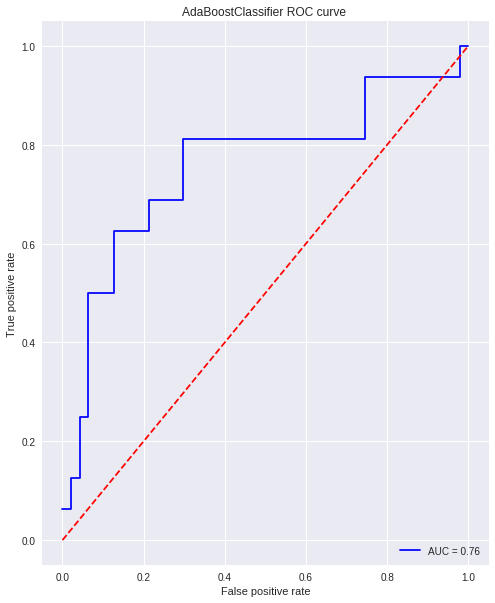

In [124]:
print("Validation score",adaboost.score(Xval,Yval))
print("--------------------------------------------")
print("test score",adaboost.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(adaboost, Xtest, Ytest)

### Adaboost Classifier on all Dataset

In [236]:
param_grid_adaboost = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.001, 0.001, 0.01, 0.1, 0.2, 0.5,1]
}
# Create a based model
adaboost_all = AdaBoostClassifier()
# Instantiate the grid search model
grid_search_adaboost_all = GridSearchCV(estimator = adaboost_all, param_grid = param_grid_adaboost, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
#Ytrain = ytrain.reshape(len(Ytrain),)
grid_search_adaboost_all.fit(x_train_all, y_train_all)
grid_search_adaboost_all.best_params_

Fitting 10 folds for each of 21 candidates, totalling 210 fits
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimat

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.1s


[CV] ................. n_estimators=1000, learning_rate=0.001 -   0.2s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.0s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .................. n_estimators=200, learning_rate=0.001 -   0.1s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] ................. n_estimators=1000, learning_rate=0.001 -   0.2s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] ................. n_estimators=1000, learning_rate=0.001 -   0.2s
[CV] n_estimators=200, learning_rate=0.001 ...........................
[CV] .

[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................... n_estimators=200, learning_rate=0.1 -   0.0s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................... n_estimators=200, learning_rate=0.1 -   0.0s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .................. n_estimators=1000, learning_rate=0.01 -   0.1s
[CV] n_estimators=200, learning_rate=0.1 .............................
[CV] .

[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=1000, learning_rate=0.2 ............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.2s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.2s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min


[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.2s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] ................... n_estimators=1000, learning_rate=0.2 -   0.1s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=200, learning_rate=0.5 .............................
[CV] .................... n_estimators=200, learning_rate=0.5 -   0.0s
[CV] n_estimators=500, learning_rate=0.5 .............................
[CV] .

[CV] ..................... n_estimators=1000, learning_rate=1 -   0.1s
[CV] ..................... n_estimators=1000, learning_rate=1 -   0.1s
[CV] ..................... n_estimators=1000, learning_rate=1 -   0.1s
[CV] ..................... n_estimators=1000, learning_rate=1 -   0.1s


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.9min finished


{'learning_rate': 1, 'n_estimators': 200}

In [239]:
adaboost_all = AdaBoostClassifier(learning_rate=1, n_estimators=200)
adaboost_all.fit(x_train_all, y_train_all)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=200, random_state=None)

### Linear Discriminant Analysis

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(Xtrain, Ytrain)

/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Validation score 0.5714285714285714
--------------------------------------------
test score 0.6190476190476191
--------------------------------------------
AUC score: 0.617021 


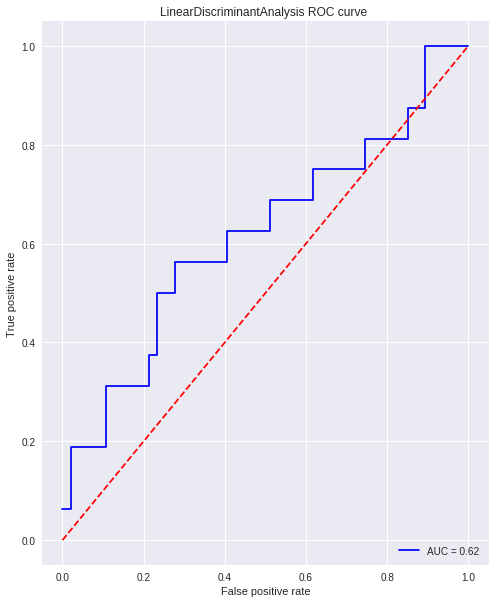

In [125]:
print("Validation score",LDA.score(Xval,Yval))
print("--------------------------------------------")
print("test score",LDA.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(LDA, Xtest, Ytest)

### Linear Discriminant Analysis on all dataset

In [240]:
LDA_all = LinearDiscriminantAnalysis()
LDA_all.fit(x_train_all, y_train_all)

/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### Voting

In [242]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Logreg', logreg2),('Logregcv', logregcv), ('SVM', svcmodel),
                                      ('KNN', knnmodel), ('clf', clf), ('tree', treeclassifier), 
                                      ('ada', adaboost), ('lda', LDA), ('Nusvm', nusvc)], 
                       voting='soft', weights=[3,3,4,1,2,1,2,2,4]).fit(Xtrain,Ytrain)

/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [208]:
print('The accuracy is:',ensemble.score(Xtest,Ytest))

The accuracy is: 0.8095238095238095


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC score: 0.908245 


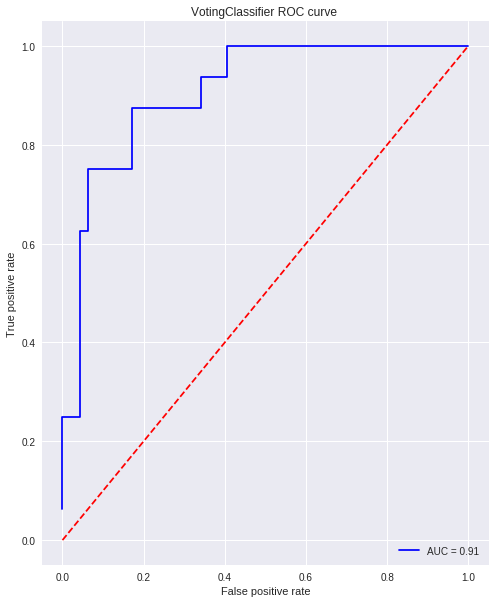

In [209]:
threshold = plot_roc(ensemble, Xtest, Ytest)

In [129]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred1 = ensemble.predict(Xtest)
cm1 = metrics.confusion_matrix(Ytest, y_pred1)
#print(cm)

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


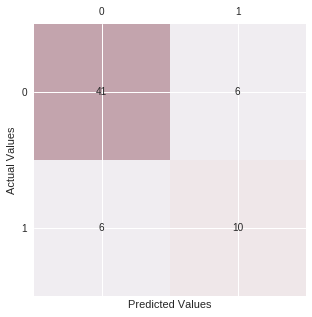

             precision    recall  f1-score   support

         -1       0.87      0.87      0.87        47
          1       0.62      0.62      0.62        16

avg / total       0.81      0.81      0.81        63



In [130]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm1, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm1.shape[0]):
     for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,
                s=cm1[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(Ytest, y_pred1 ))

### Voting on all dataset

In [243]:
ensemble_all=VotingClassifier(estimators=[('Logreg', logreg2_all),('Logregcv', logregcv_all), ('SVM', svcmodel_all),
                                      ('KNN', knnmodel_all), ('clf', clf_all), ('tree', treeclassifier_all), 
                                      ('ada', adaboost_all), ('lda', LDA_all), ('Nusvm', nusvc_all)], 
                       voting='soft', weights=[3,3,4,1,2,1,2,2,4]).fit(x_train_all, y_train_all)

/usr/lib/python3/dist-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Prediction on xtest

In [132]:
x_test = xtest.T[good_features]
x_test = x_test.T

In [244]:
import collections
n = 0
predicts = {}
for i in range(len(x_test)):
    if(ensemble.predict_proba(x_test)[i][1] > 0.5):
        n += 1
    print('sample'+str(i+1),'--------------------------------->', ensemble.predict_proba(x_test)[i][1])
print(n)

sample1 ---------------------------------> 0.059992270116418306
sample2 ---------------------------------> 0.2899114339865843
sample3 ---------------------------------> 0.2226177999315353
sample4 ---------------------------------> 0.44503215828509346
sample5 ---------------------------------> 0.37408680584076687
sample6 ---------------------------------> 0.22565542833050947
sample7 ---------------------------------> 0.1326135355766036
sample8 ---------------------------------> 0.18547618386773382
sample9 ---------------------------------> 0.7292495957667744
sample10 ---------------------------------> 0.22772611977881374
sample11 ---------------------------------> 0.8912880368266126
sample12 ---------------------------------> 0.4250913759784283
sample13 ---------------------------------> 0.5331820509452069
sample14 ---------------------------------> 0.15268114587935733
sample15 ---------------------------------> 0.8731185698578755
sample16 ---------------------------------> 0.1865189467

### Prediction on xtest using all dataset

In [245]:
n1 = 0
for i in range(len(xtest)):
    if(ensemble.predict_proba(x_test)[i][1] > 0.5):
        n1 += 1
    print('sample'+str(i+1),'--------------------------------->', ensemble.predict_proba(x_test)[i][1])
print(n1)  

sample1 ---------------------------------> 0.059992270116418306
sample2 ---------------------------------> 0.2899114339865843
sample3 ---------------------------------> 0.2226177999315353
sample4 ---------------------------------> 0.44503215828509346
sample5 ---------------------------------> 0.37408680584076687
sample6 ---------------------------------> 0.22565542833050947
sample7 ---------------------------------> 0.1326135355766036
sample8 ---------------------------------> 0.18547618386773382
sample9 ---------------------------------> 0.7292495957667744
sample10 ---------------------------------> 0.22772611977881374
sample11 ---------------------------------> 0.8912880368266126
sample12 ---------------------------------> 0.4250913759784283
sample13 ---------------------------------> 0.5331820509452069
sample14 ---------------------------------> 0.15268114587935733
sample15 ---------------------------------> 0.8731185698578755
sample16 ---------------------------------> 0.1865189467

23


In [162]:
pred.to_csv('predictions.csv', index=False)